In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('datasets/study/Student_Marks.csv')

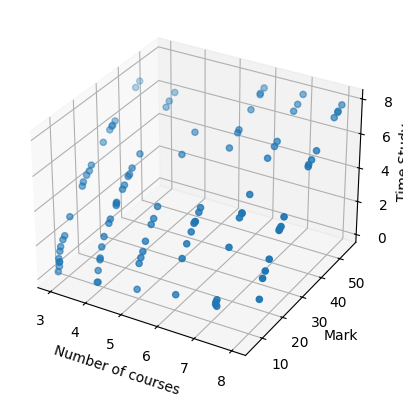

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = df['number_courses']
y = df['Marks']
z = df['time_study']

ax.scatter(x, y, z)
ax.set_xlabel('Number of courses')
ax.set_ylabel('Mark')
ax.set_zlabel('Time Study')
ax.zaxis.labelpad=-0.5

# plt.scatter(x, y)
plt.show()

Mean squared error: 12.67
R2: 0.94


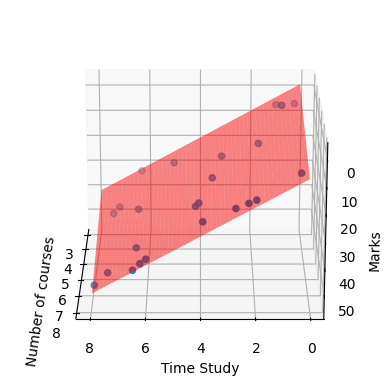

In [17]:
df.head()

set_X, set_y = df[['number_courses', 'time_study']].to_numpy(), df['Marks'].to_list()

ratio = 0.75
ratioTrain = (int) (len(df) * ratio) 
ratioTest = (int) (len(df) - (len(df) * ratio))

# ratioTest
# Split
train_X, train_y = set_X[:ratioTrain], set_y[:ratioTrain]
test_X, test_y = set_X[-ratioTest:], set_y[-ratioTest:]

regM = LinearRegression()

# Fitting
regM.fit(train_X, train_y)

# Predicting
regMPred = regM.predict(test_X)

# Our model's metrics
# regM.coef_
# print("Coefficients: %.2f"% regM.coef_)
print("Mean squared error: %.2f" % mean_squared_error(test_y, regMPred))
print("R2: %.2f" % r2_score(test_y, regMPred))


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = df['number_courses'][-ratioTest:]
y = df['Marks'][-ratioTest:]
z = df['time_study'][-ratioTest:]

ax.scatter(x,z,y)

# Create a meshgrid for plotting the plane
x_surf, z_surf = np.meshgrid(np.linspace(df['number_courses'].min(), df['number_courses'].max(), 100), 
                             np.linspace(df['time_study'].min(), df['time_study'].max(), 100))

#  getting the coefficient/slope for the multilinear regression
y_surf = regM.intercept_ + regM.coef_[0] * x_surf + regM.coef_[1] * z_surf

# Plot the surface
ax.plot_surface(x_surf, z_surf, y_surf, color='red', alpha=0.5)

# Label the axes
ax.set_xlabel('Number of courses')
ax.set_ylabel('Time Study')
ax.set_zlabel('Marks')

# Elevation = How high to look up
#  Azimuth = in which direction to look
ax.view_init(elev=200, azim=180)